## 3. 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다. 
  


<정밀도, 재현율 공식>  
$$ 정밀도(Precision) = \frac{TP}{FP + TP} = \frac{맞은 예측}{예측}$$  
$$ 재현율(Recall) = \frac{TP}{FN + TP} = \frac{맞은 예측}{실제}$$  
  
* **정밀도(Precision)**  
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율  
Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 `양성 예측도`라고도 불린다  
  
* **재현율(Recall)**  
실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율  
`민감도(Sensitivity)` 또는 `TPR(True Positive Rate)` 라고도 불린다

정밀도와 재현율 지표는 이진 분류 모델의 업무 특성에 따라 적합한 지표가 존재한다.  
  
<예시>
1. `암 판단 모델`은 실제 Positive인 암 환자를 Positive(양성)이 아닌 Negative(음성)으로 판단할 경우 생명을 앗아갈 정도로 심각한 오류이기 때문에 **재현율**이 중요한 지표이다. 반면에 실제 Negative(음성)인 건강한 환자를 암 환자인 Positive(양성)으로 판단할 경우 그 환자는 재검사를 하는 수준의 막대한 비용이 들 것이다.  
  
  
  
2. 보험 사기와 같은 `금융 사기 적발 모델`도 **재현율**이 중요하다.  
실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면 회사에 미치는 손해는 클 것이다. 반면에 정상 금융거래인 Negative를 Positive로 판단하게 되면 재확인 절차가 소모된다. 물론 고객에게 금융 사기 혐의를 잘못 씌우면 문제가 될 수 있기에 정밀도도 중요 평가 지표지만, 업무적인 특성을 고려하면 재현율이 상대적으로 더 중요한 지표이다.  
  
  
  
3. `스펨메일 여부를 판단하는 모델`의 경우 **정밀도**가 중요하다.  
실제 Posivie인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도지만, 실제 Negative인 일반 메일을 Positive인 스펨 메일로 분류할 경우에는 이메이을 아예 받지 못하게 되어 업무에 차질이 생긴다

* **재현율**이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우(Negative가 압도적으로 많은 클래스에서 재현율을 사용하면 Positive를 얼마나 잘 예측할 수 있는지 알 수 있다.)  
  
  
* **정밀도**가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우(Positive를 얼마나 남발하지 않았는지를 확인하는 척도)

**<font color = blue>보통 재현율이 정밀도보다 상대적으로 중요한 업무가 많다.**

**재현율**은 FN을 낮추는데, **정밀도**는 FP를 낮추는데 초점을 맞춘다.  
이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다.  
가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다.  
반면에 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치를 매우 낮은 결과를 나타내는 경우는 바람직하지 않다.

In [1]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

# 오차 행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
## 로지스틱 회귀 기반으로 타이타닉 생존자 예측 후 위의 평가 진행

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습/테스트 데이터 분할
titanic = pd.read_csv('data_set/titanic_train.csv')
y_titanic = titanic['Survived']
X_titanic = titanic.drop('Survived', axis = 1)
X_titanic = transform_features(X_titanic)

X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic,
                                                   test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\jinho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

### 정밀도/재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 / 재현율이 특별히 강조돼야 할 경우, 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.  
  
  
하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽상이다.  
  
  
이를 정밀도/재현율 `트레이드오프(Trade-off)`라고 한다.

사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측한다.  
  
일반적으로 이진 분류에서는 이 임곗값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정한다.

`predict_proba()` : 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률 반환

* predict_proba() 메소드 확인

In [11]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])
print('\n')

# 예측 확률 array와 예측 결과값 array를 concatenate 하여 예측 확률과 결과값을 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)], axis = 1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46170212 0.53829788]
 [0.87864222 0.12135778]
 [0.87728507 0.12271493]]


두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46170212 0.53829788 1.        ]
 [0.87864222 0.12135778 0.        ]
 [0.87728507 0.12271493 0.        ]]


* Binarizer 활용

In [13]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


* 분류 결정 임계값 = 0.5 기반에서 Binarzier를 이용하여 예측값 반환

In [37]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [39]:
## 임계값 = 0.4

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


### <font color = blue>**임계값을 0.5 -> 0.4  /  재현율 증가, 정밀도 감소**

**Why?**  
분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준  
확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임계값을 낮출수록 True 값이 많아진다.  
Positive 예측값이 많아지면 상대적으로 재현율 값이 높아진다  
-> 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어듦  
  
재현율은 올랐지만 정밀도가 감소, 정확도 또한 감소하였다.  
따라서 임계값을 0.4에서 0.6까지 0.05씩 증가하여 각 수치를 확인해보자

In [66]:
# 테스트를 수행할 모든 임계값 리스트화
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체내의 값을 차례로 iteration 하면서 Evaluaion 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print('')

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361

임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033

임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869

임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541

임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377



* precision_recall_curve()를 이용한 임계값에 따른 정밀도-재현율 값 추출

In [70]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1 일때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 정밀도 배열의 Shape:', precisions.shape)
print('반환된 재현율 배열의 Shape:', recalls.shape)
print('')

print("임계값 5 sample:", thresholds[:5])
print("정밀도 5 sample:", precisions[:5])
print("재현율 5 sample:", recalls[:5])
print('')

# 반한된 임계값 배열 로우가 143건이므로 샘플로 10건만 추출, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))
print('')

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 정밀도 배열의 Shape: (144,)
반환된 재현율 배열의 Shape: (144,)

임계값 5 sample: [0.10392303 0.10392523 0.10394993 0.10734518 0.10890452]
정밀도 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
재현율 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]

샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


**추출된 샘플로 알 수 있는 점은 임계값별 정밀도가 증가하면 재현율이 감소하는 반비례 관계에 있음이다**

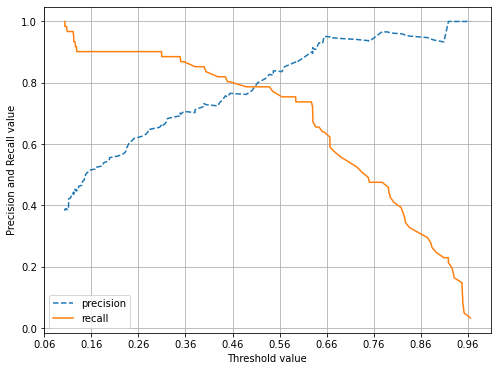

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축을 정밀도, 재현율 값으로 각각 Plot 수행(정밀도=점선)
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold 값 X 축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

그래프 상에서도 알 수 있듯 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 높아지고, 정밀도 값이 낮아진다.  
  
해당 titanic 데이터 셋에선 임계값 0.5 지점에서 재현율과 정밀도가 비슷해지는 경향을 띈다